In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

In [54]:
df = pd.read_excel('..\\ny_crime_13.xls', header=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [59]:
df_features = pd.DataFrame()
df_features['pop'] = np.where(df.loc[:,'Population'] < 3*df.Population.std(), df.Population, 3*df.Population.std())
df_features['pop_squared'] = df_features['pop']**2
df_features['murder'] = np.where(df.iloc[:, 3] > 0, 1, 0)
df_features['robbery'] = np.where(df.iloc[:, 6] > 0, 1, 0)
df_features['prop_crime'] = df.loc[:, 'Property\ncrime']
df_features.dropna(inplace=True)
df_features.count()

pop            348
pop_squared    348
murder         348
robbery        348
prop_crime     348
dtype: int64

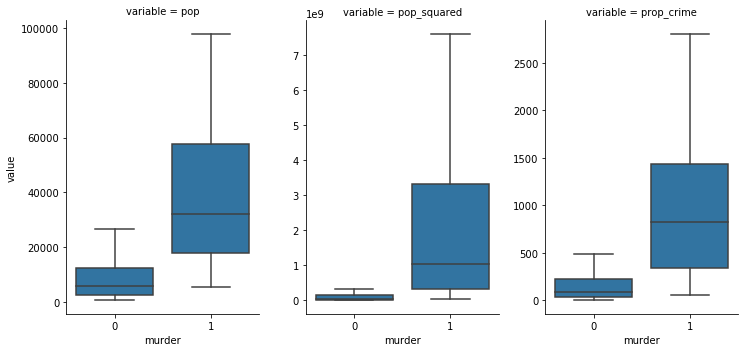

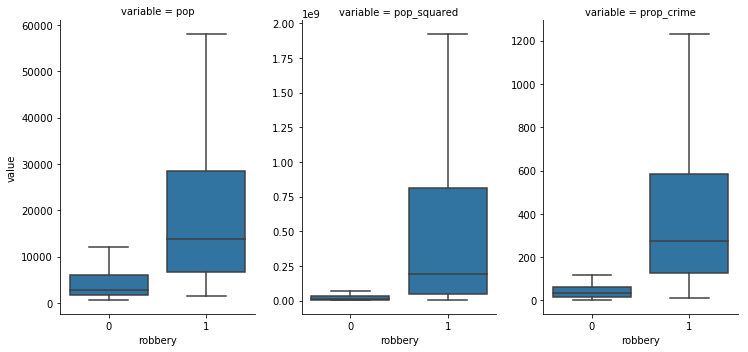

In [60]:
# Restructure the data so we can use facetgrid
df_long = df_features
df_long = pd.melt(df_long, id_vars=['murder', 'robbery'])
g = sns.FacetGrid(df_long, col='variable', size = 5, aspect=.7, sharey=False)
g = g.map(sns.boxplot, 'murder', 'value', showfliers=False)
plt.show()

g2 = sns.FacetGrid(df_long, col='variable', size = 5, aspect=.7, sharey=False)
g2 = g2.map(sns.boxplot, 'robbery', 'value', showfliers=False)
plt.tight_layout()
plt.show()

In [67]:
regr = linear_model.LinearRegression()
Y = df_features['prop_crime'].values.reshape(-1,1)
X = df_features[['robbery', 'murder', 'pop', 'pop_squared']]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
regr.fit(X_train,y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [[  3.05199579e+00   8.73578482e+01   2.29007987e-02   6.09315265e-08]]

Intercept: 
 [-54.83220808]

R-squared:
0.997254579298


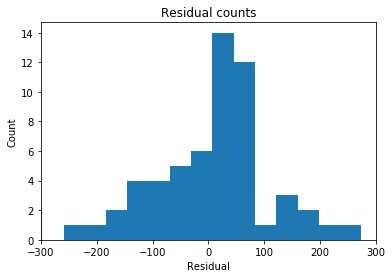

In [76]:
y_pred = regr.predict(X_test)
residual = y_test - y_pred
plt.hist(residual, bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim([-300, 300])
plt.show()

I still do not have enough experience to know if this is considered normal or not... It almost appears that it has a left tail, and a strange bump thing on the right.

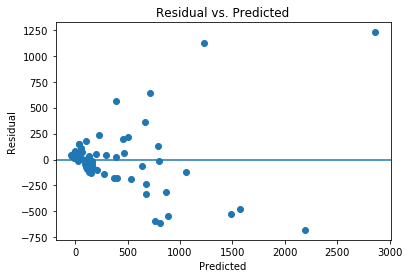

In [78]:
plt.scatter(y_pred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

